In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target

C:\Users\user\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [8]:
# print(X.head())
y.shape

(70000,)

# (a) Modified the code so that it uses L1-distance instead of the default
# L2-distance (Euleadean). (b) K value that gives better performance?
# (c) Reported the Accuracy and (d) Displayed results by showing the image, actual
# label, and predicted label. Hence found a few samples where the predicted label
# is incorrect.

In [3]:
#a) To note that above accuracy decreased to 0.965 when I changed the parameter to p=1 from p=2(default),which used L1 distance
# instead of L2 distance.
# (b) Find out the K that gives better performance.: K=3 gives teh best result.
# (c) Report the Accuracy: For k=3,the accuracy is 0.9661428571428572

In [5]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with different K's
# for i in range(1,10,1):
for i in range(9,16,1):
    knn_classifier = KNeighborsClassifier(n_neighbors=i,p=1)

    # Train the classifier on the training data
    knn_classifier.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = knn_classifier.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for neighbor:{i}:", accuracy)

Accuracy for neighbor:9: 0.9605
Accuracy for neighbor:10: 0.9588571428571429
Accuracy for neighbor:11: 0.9599285714285715
Accuracy for neighbor:12: 0.9578571428571429
Accuracy for neighbor:13: 0.9575
Accuracy for neighbor:14: 0.9570714285714286
Accuracy for neighbor:15: 0.9563571428571429


In [118]:
# Accuracy for neighbor:1: 0.9657142857142857
# Accuracy for neighbor:2: 0.9561428571428572
# Accuracy for neighbor:3: 0.9661428571428572
# Accuracy for neighbor:4: 0.9625
# Accuracy for neighbor:5: 0.965
# Accuracy for neighbor:6: 0.9611428571428572
# Accuracy for neighbor:7: 0.962
# Accuracy for neighbor:8: 0.9613571428571429
# Accuracy for neighbor:9: 0.9605
# Accuracy for neighbor:10: 0.9588571428571429
# Accuracy for neighbor:11: 0.9599285714285715
# Accuracy for neighbor:12: 0.9578571428571429
# Accuracy for neighbor:13: 0.9575
# Accuracy for neighbor:14: 0.9570714285714286
# Accuracy for neighbor:15: 0.9563571428571429


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with different K=3(as it has best accuracy based on above code performance)
knn_classifier = KNeighborsClassifier(n_neighbors=3,p=1)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for neighbor,3 : %.4f" %accuracy)

Accuracy for neighbor,3 : 0.9661


(14000, 784)
Random list of index:	[3487, 4004, 2303, 13810, 368, 3205, 5100, 6988, 6820]


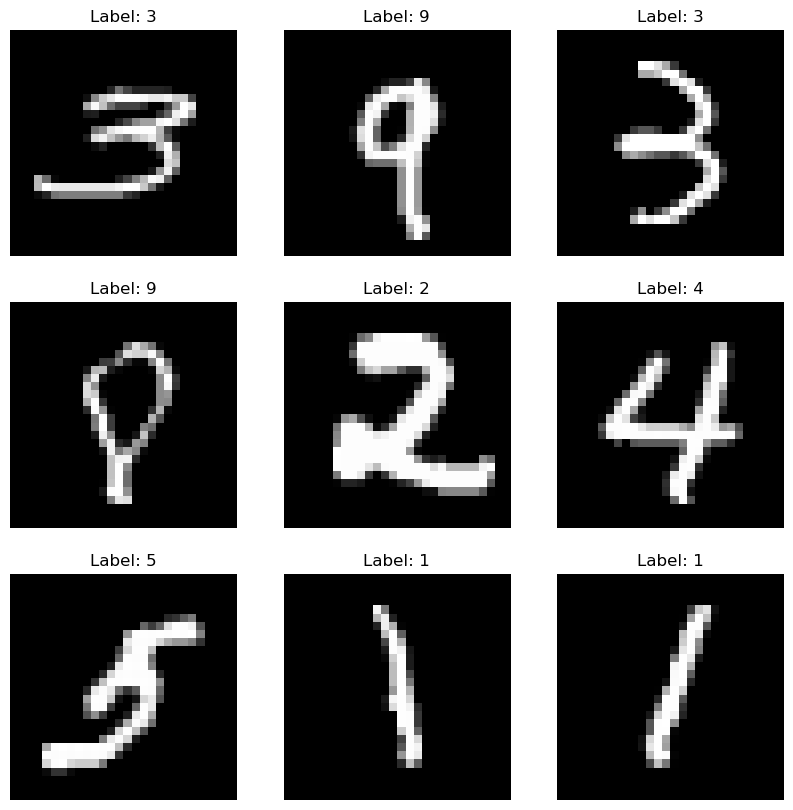

In [128]:
# To Display Images and Predicted Labels 
import matplotlib.pyplot as plt
# Randomly pick an index

# print(random_index)
print(X_test.shape)
random = []
for z in range(9):
    random.append(np.random.randint(0,len(X_test)))
    X_test=np.array(X_test)
print(f"Random list of index:\t{random}")
# Get the image data and label 
# Reshaped to 28 x 28 as total pix 784

fig,ax = plt.subplots(3,3,figsize=(10,10))
i = 0
for j in range(3):
    for k in range(3):
        
        image = X_test[random[i],:].reshape(28,28)
        label = y_pred[random[i]]
        ax[j][k].imshow(image, cmap='gray')
        ax[j][k].set_title(f"Label: {label}")
        ax[j][k].axis('off')
        i = i+1



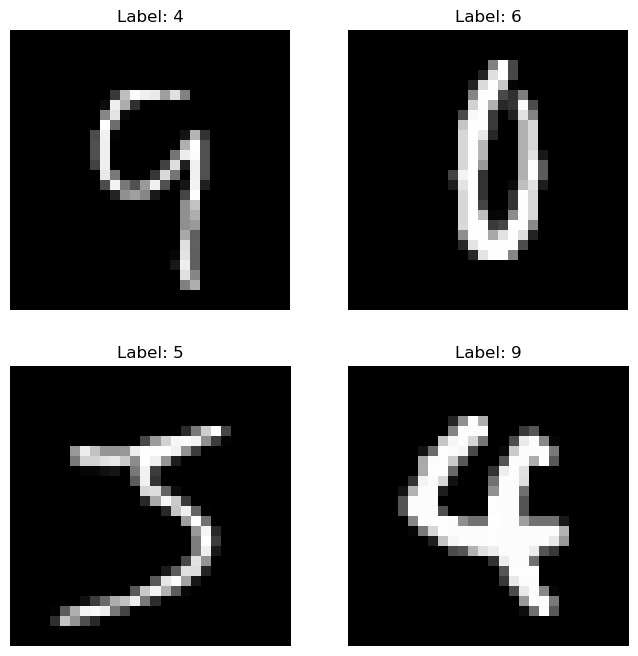

In [123]:
# Find out a few samples where the predicted label is incorrect(MISCLASSIFIED)
mismatch_label_index = []
for i in range(len(y_test)):
    if((y_pred[i]) != (y_test.iloc[i])):
        mismatch_label_index.append(i)

fig, ax = plt.subplots(2,2,figsize=(8,8))
z = 0
for a in range(2):
    for b in range(2):
        image = X_test[mismatch_label_index[z],:].reshape(28,28)
        label = y_pred[mismatch_label_index[z]]
        ax[a][b].imshow(image, cmap='gray')
        ax[a][b].set_title(f"Label: {label}")
        ax[a][b].axis('off')
        z+=1

# ***********************INCASE WE WANT RANDOM VALUES TO DETECT THE MISCLASSIFICATION:*********************
# mismatch_label_index = []
# for i in range(len(y_test)):
#     if((y_pred[i]) != (y_test.iloc[i])):
#         mismatch_label_index.append(i)

# fig, ax = plt.subplots(2,2,figsize=(8,8))
# z = 0
# for a in range(2):
#     for b in range(2):
#         r_indx = np.random.randint(0,len(mismatch_label_index))
#         image = X_test[mismatch_label_index[r_indx],:].reshape(28,28)
#         label = y_pred[mismatch_label_index[r_indx]]
#         ax[a][b].imshow(image, cmap='gray')
#         ax[a][b].set_title(f"Label: {label}")
#         ax[a][b].axis('off')